In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [10]:
def sample_prior(n):
    return np.random.normal(5, 2, n)

In [11]:
np.random.seed(17)

# can also calculate this analytically

grid = np.linspace(-10, 10, 2000)
mus = sample_prior(10_000).reshape(-1,1)  # Shape (10000, 1) for broadcasting
cdf_values = scipy.stats.norm.cdf(mus - grid)  # Shape (10000, 2000)
true_risk = np.mean(mus * cdf_values, axis=0)  # Average over the samples

bayes_decision = grid[np.argmax(true_risk)]
bayes_welfare = np.max(true_risk)
print(bayes_decision)
print(bayes_welfare)

-1.1455727863931973
4.988348427846612


In [12]:
# mus = np.random.normal(5,2,n)
# Xs = np.random.normal(mus,1)
# C_grid = np.linspace(min(Xs) - 3, max(Xs) + 3, 500)

# # Compute F_1: Sum of Xs for all elements greater than each C_grid point
# F_1 = np.sum(Xs[:, None] * (Xs[:, None] >= C_grid), axis=0)

In [13]:

def UWE_decision(Xs):
    C_grid = np.linspace(min(Xs) - 3, max(Xs) + 3, 500)

    # Compute F_1: Sum of Xs for all elements greater than each C_grid point
    F_1 = np.sum(Xs[:, None] * (Xs[:, None] >= C_grid), axis=0)

    # Compute pairwise differences
    d = Xs[:, None] - C_grid[None, :]
    h_n = np.sqrt(np.log(len(Xs)))  # Assuming n = len(Xs)

    # Compute F_2: Kernel estimate using a stable division approach
    F_2 = np.sum(np.where(d == 0, 0, np.sin(h_n * d) / (np.pi * d)), axis=0)

    # Compute UWE and find the optimal threshold
    UWE = F_1 - F_2
    return C_grid[np.argmax(UWE)]


In [14]:
mc_samples = 200
n_range = np.arange(5,10000,500)

regret = np.zeros(shape = (len(n_range),mc_samples)) # regret compared to the Bayes estimator

for i in range(len(n_range)):
    n = n_range[i]
    for j in range(mc_samples):
        mus = sample_prior(n)
        Xs = np.random.normal(mus,1)
        regret[i,j] = mus[(Xs > bayes_decision)].sum() - mus[(Xs > UWE_decision(Xs))].sum()


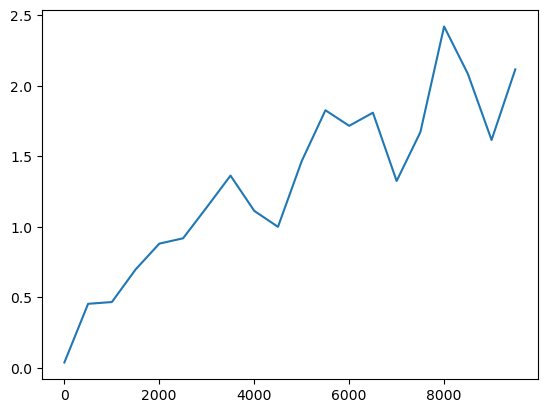

In [15]:
plt.plot(n_range, regret.mean(axis = 1)) # looks like sqrt, which makes sense.

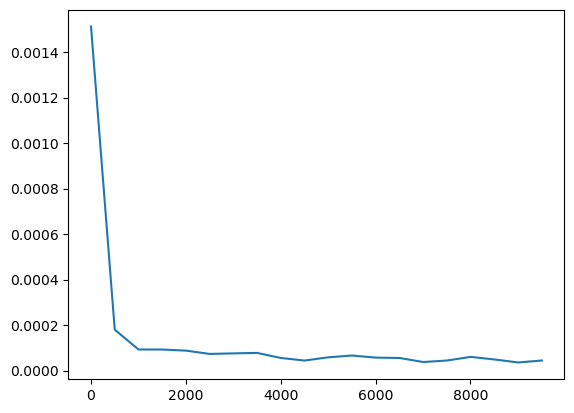

In [16]:
plt.plot(n_range, regret.mean(axis = 1)/(n_range*bayes_welfare)) # normalized to the Bayes regret